# Konsep Dasar
Algoritma ini merupakan pengembangan dari Decision Tree. Suatu model akan di traninig menggunakan beberapa model decision tree, kemudian dilakukan voting. Ilustrasinya, pohon adalah decision tree sedangkan hutan adalah random forest.

In [1]:
import pandas as pd 
from datetime import datetime, timedelta, date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# 1. Data Preprocessing
Dataset yang digunakan berasal dari kaggle.com yaitu https://www.kaggle.com/uciml/pima-indians-diabetes-database. Variabel yang digunakan adalah

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness :Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.1 Import Datasets

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = diabetes[feature_cols]
y = diabetes.Outcome

## 1.2 Split datasets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 2. Modeling

In [10]:
cv=StratifiedKFold(n_splits=10)

In [11]:
fit = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = fit.predict(X_test)

## 2.2 Evaluation Model
Tahapan ini berfungsi untuk mengetahui apakah model yang digunakan layak digunakan alat prediksi. Beberapa cara yang dapat dijadikan evaluasi model
1. Akurasi (> 80%)
2. Presisi (> 80%)
3. F1-Score (> 80%)
4. Recall (> 80%)

In [12]:
confusion_matriks = confusion_matrix(y_test, y_pred)
classification_reports = classification_report(y_test, y_pred)

In [13]:
print(confusion_matriks)

[[123  28]
 [ 29  51]]


In [14]:
print(classification_reports)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [15]:
"""
Variabel mana yang paling penting dapat dilihat di bagian ini
"""
df_importance = pd.DataFrame(fit.feature_importances_).T
df_importance.columns = feature_cols
df_importance2 = df_importance.T.reset_index()
df_importance2.columns = ['variabel','relatif_importance']
df_importance2 = df_importance2.sort_values('relatif_importance',ascending=False)
df_importance2

,variabel,relatif_importance
4,Glucose,0.277244
2,BMI,0.182137
3,Age,0.154525
6,DiabetesPedigreeFunction,0.121030
5,BloodPressure,0.091779
1,Insulin,0.088866
0,Pregnancies,0.084418


<BarContainer object of 7 artists>

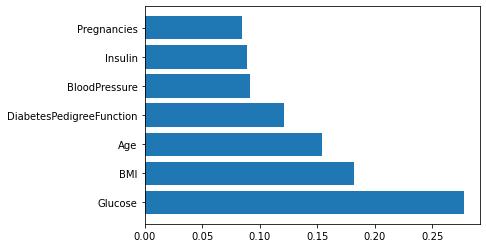

In [16]:
plt.barh(df_importance2['variabel'],df_importance2['relatif_importance'])

# Referensi
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://scikit-learn.org/stable/modules/tree.html
- https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/
- https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01